# Oscillatore armonico

Studio di uno oscillatore armonico senza smorzamento.

L'oscillatore è composto da una massa collegata ad una molla.

![titolo](img/oscillatore.gif)

In condizioni ideali, tutta la massa del sistema è concentrata nella massa stessa e la molla risulta a massa zero. Tra il piano e la massa non consideriamo la presenza dell'attrito.

In queste condizioni l'unica forza che agisce è data dalla forza elastica $F=-k \cdot x(t)$. <br>
Per la seconda legge di Newton $F=m \cdot a(t)$ si avrà quindi che $m \cdot a(t)=-k \cdot x(t)$

In [2]:
import sympy as sp
import math
t = sp.Symbol('t')
x = sp.Function('x')

## Creazione dell'equazione del moto

Si definiscono i parametri del sistema: <br>
$m$ : massa (kg)<br>
$k$ : costante elastica della molla (kg/m)

In [3]:
m = 0.2
k = 10

diffeq = sp.Eq(m*x(t).diff(t,t),-k*x(t))
print('Equazione del moto')
diffeq

Equazione del moto


Eq(0.2*Derivative(x(t), (t, 2)), -10*x(t))

## Condizioni iniziali del moto

Le condizioni iniziali del moto sono date dal valore della posizione iniziale $x(0)$ e dalla velocità iniziale $v(0)$.

Le condizioni sono espresse in valori con unità di misura del sistema internazionale.

In [4]:
ics={x(0): 0.1, sp.diff(x(t), t).subs(t,0): 0}

## Ricerca della soluzione del sistema

La legge oraria è data dalla soluzione dell'equazione differenziale che modella il sistema.

In [5]:
sol = sp.dsolve(diffeq, ics=ics)
print('Legge oraria del moto')
sol

Legge oraria del moto


Eq(x(t), 0.1*cos(7.07106781186547*t))

## Calcolo della pulsazione

La pulsazione del moto è data dalla formula $\omega = \sqrt{k/m}$ e come si può osservare la soluzione possiede proprio tale pulsazione.

In [6]:
print('Pulsazione')
omega = math.sqrt(k/m)
omega

Pulsazione


7.0710678118654755

## Grafico della posizione al variare del tempo


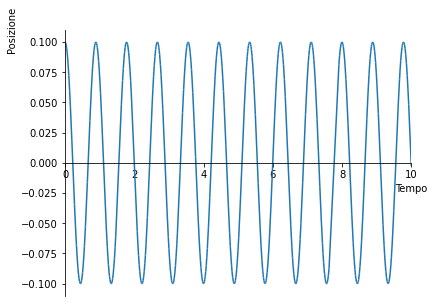

In [7]:
sp.plot(sol.rhs, xlim=(0,10), xlabel='Tempo', ylabel='Posizione', show=True)

# Introduzione di uno smorzamento

Solitamente nella realtà l'effeto non è come descritto finora poiché la molla avrà uno smorzamento con una forza che si oppone al moto dipendente dalla velocità $F = -c \cdot v(t)$.

![oscillatore](img/oscillatoresmor.gif)

Pertantò cambierà l'equazione che modella il sistema, che diventa $m \cdot a(t) = -k\cdot x(t) -c\cdot v(t)$

In [8]:
m = 0.3
k = 10
c = 0.05

diffeq = sp.Eq(m*x(t).diff(t,t),-c*x(t).diff(t) -k*x(t))
print('Equazione del moto')
diffeq

Equazione del moto


Eq(0.3*Derivative(x(t), (t, 2)), -10*x(t) - 0.05*Derivative(x(t), t))

## Ricerca della nuova soluzione

La soluzione, mantenendo le stesso condizioni iniziali, presenta ora una componente esponenziale che smorzano le oscillazioni portando il moto a scomparire dopo qualche secondo.

In [9]:
sol = sp.dsolve(diffeq, ics=ics)
print('Legge oraria del moto')
sol

Legge oraria del moto


Eq(x(t), (0.00144352604810319*sin(5.77290125403933*t) + 0.1*cos(5.77290125403933*t))*exp(-0.0833333333333333*t))

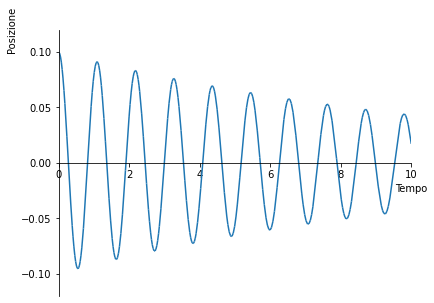

In [15]:
sp.plot(sol.rhs, xlim=(0,10), ylim=(-0.12,0.12), xlabel='Tempo', ylabel='Posizione', show=True)

# Analisi in frequenza

Analisi in frequenza del sistema massa molla smorazatore a cui viene applicata una forza esterna $F(t)$.

In [11]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

## Trasformata di fourier del sistema

La seguente funzione $ H(s) = \dfrac{1}{m \cdot s^2 + c \cdot s + k}$ corrisponde alla trasofrmata di fourier dell'equazione del sistema $m \cdot a(t) = F(t) -k\cdot x(t) -c\cdot v(t)$


In [12]:
num = [1]
den = [m, c, k]
tf = signal.TransferFunction(num, den)

## Diagrammi di bode

Il diagramma di bode mostra una risonanza.

Pulsazione di risonanza


5.722367659350219

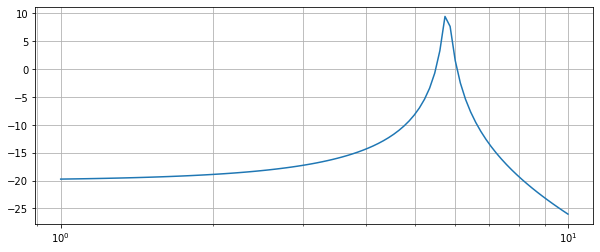

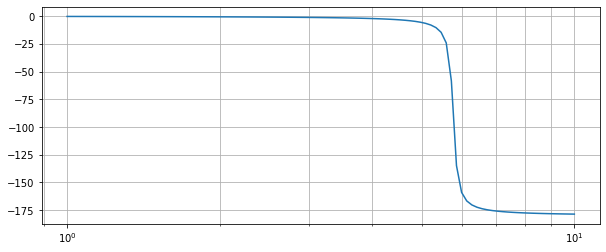

In [13]:
w, mag, phase = signal.bode(tf)
plt.figure(figsize=(10,4))
plt.semilogx(w, mag)
plt.grid(which='both')
plt.figure(figsize=(10,4))
plt.semilogx(w, phase)
plt.grid(which='both')
pos = np.argmax(mag)
w_ris = w[pos]
print('Pulsazione di risonanza')
w_ris

## Applicazione di un ingresso

Si applica un ingresso con pulsazione pari a quella di risonanza e si nota come il sistema reagisce

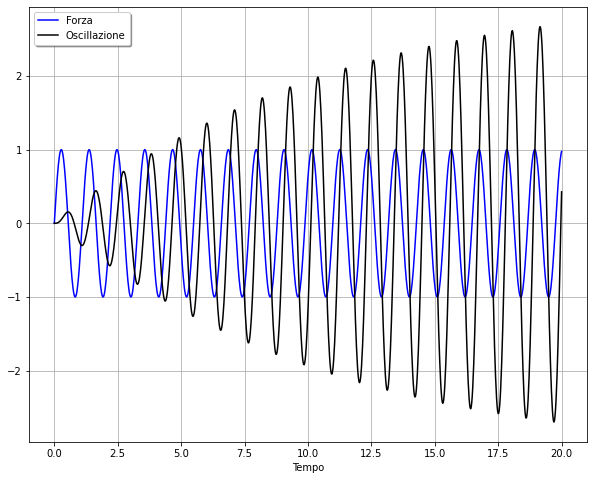

In [14]:
t = np.linspace(0,20,1000)
f = 1*np.sin(w_ris*t)
tout, yout, xout = signal.lsim(tf, U=f, T=t)
plt.figure(figsize=(10,8))
plt.plot(t, f, 'b', label='Forza')
plt.plot(tout, yout, 'k', label='Oscillazione')
plt.legend(loc='best', shadow=True)
plt.grid()
plt.xlabel('Tempo')
plt.show()